In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
import pandas as pd
from pandas import DataFrame
import seaborn as sns 

In [2]:
def dataprocess(old_data):
    new_data = copy.deepcopy(old_data)
    for k in range(len(new_data)):   
        for i in range(len(new_data[k])):
            if new_data[k][i] > 2*(np.mean(old_data[k])):
                new_data[k][i] = np.median(new_data[k])
    return new_data

In [3]:
num = '0';
names = ['256', '512', '1K', '2K', '4K', '8K', '16K', '32K', '64K', '128K', '256K', '512K', '1M', '2M', '4M']
rawdata_non_without = []
rawdata_non_with = []
rawdata_with = []
rawdata_without = []

In [4]:
# Store all the data from the transport time
# with non-real propotities and no extra load on CPU
for i in range(len(names)):
    filename = "transport_time/nonReal_withoutExtra/transport_time_" + names[i] + "byte.txt"
    a = np.loadtxt(filename)
    rawdata_non_without.append(a)

In [5]:
# with non-real propotities and extra load on CPU
for i in range(len(names)):
    filename = "transport_time/nonReal_with/transport_time_" + names[i] + "byte.txt"
    a = np.loadtxt(filename)
    rawdata_non_with.append(a)

In [6]:
# with real propotities and extra load on CPU
for i in range(len(names)):
    filename = "transport_time/Real_with/transport_time_" + names[i] + "byte.txt"
    a = np.loadtxt(filename)
    rawdata_with.append(a)

In [7]:
# with real propotities and no extra load on CPU
for i in range(len(names)):
    filename = "transport_time/Real_without/transport_time_" + names[i] + "byte.txt"
    a = np.loadtxt(filename)
    rawdata_without.append(a)

In [8]:
print(len(rawdata_non_without))
print(rawdata_non_without[0][0])

15
0.011198282


In [9]:
# data = [rawdata_with, rawdata_without, rawdata_non_with, rawdata_non_with]


# d = {'one' : pd.Series(rawdata_non_with   , index = names), 
#      'two' : pd.Series(rawdata_non_without, index = names)}

# df = pd.DataFrame(d)


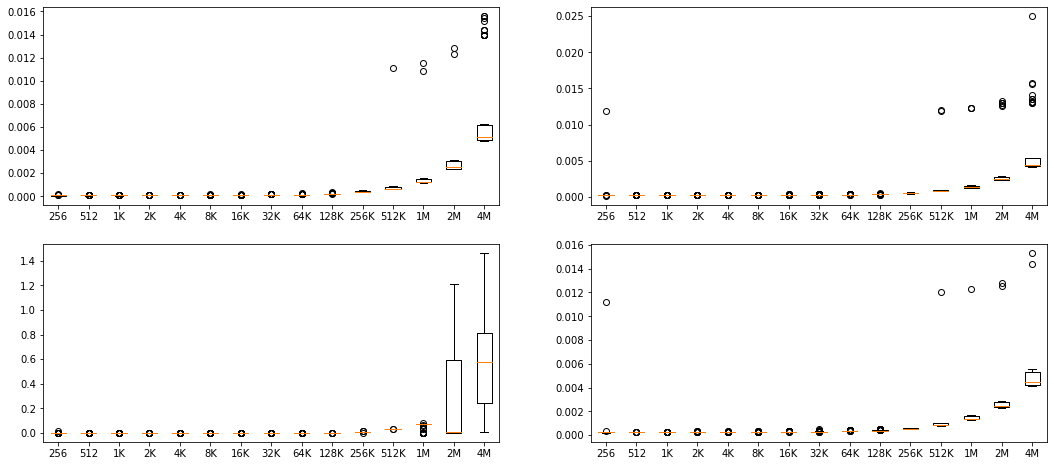

In [10]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(18,8))


bplot1=axes[0][0].boxplot(rawdata_with, labels = ['256', '512', '1K', '2K', '4K', '8K', '16K', '32K', '64K', '128K', '256K', '512K', '1M', '2M', '4M'],
                       vert=True)

#axes[0]表示在第一张图的轴上描点画图
#vert=True表示boxplot图是竖着放的

bplot2 = axes[0][1].boxplot(rawdata_without, labels = ['256', '512', '1K', '2K', '4K', '8K', '16K', '32K', '64K', '128K', '256K', '512K', '1M', '2M', '4M'],
                         vert=True)

bplot3 = axes[1][0].boxplot(rawdata_non_with, labels = ['256', '512', '1K', '2K', '4K', '8K', '16K', '32K', '64K', '128K', '256K', '512K', '1M', '2M', '4M'],
                       vert=True)

bplot4 = axes[1][1].boxplot(rawdata_non_without, labels = ['256', '512', '1K', '2K', '4K', '8K', '16K', '32K', '64K', '128K', '256K', '512K', '1M', '2M', '4M'],
                         vert=True)
plt.show()

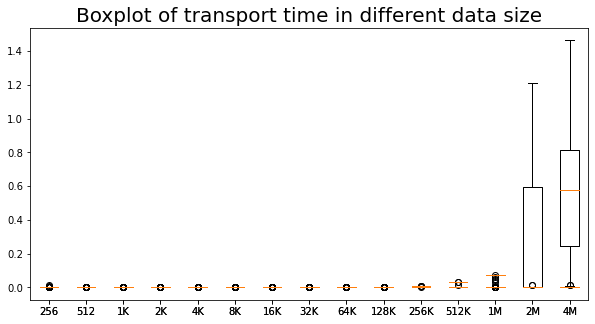

In [11]:


plt.figure(figsize=(10,5))#设置画布的尺寸
plt.title('Boxplot of transport time in different data size',fontsize=20)#标题，并设定字号大小
labels = ['x1','x2']#图例
plt.boxplot(rawdata_non_with, labels = ['256', '512', '1K', '2K', '4K', '8K', '16K', '32K', '64K', '128K', '256K', '512K', '1M', '2M', '4M'])#grid=False：代表不显示背景中的网格线
plt.boxplot(rawdata_non_without, labels = ['256', '512', '1K', '2K', '4K', '8K', '16K', '32K', '64K', '128K', '256K', '512K', '1M', '2M', '4M'])#grid=False：代表不显示背景中的网格线
# data.boxplot()#画箱型图的另一种方法，参数较少，而且只接受dataframe，不常用
plt.savefig('test data raw'+ num + '.jpg')
plt.show()#显示图像

In [12]:
# # get rid of cold starting effect
# print(data_non_without[0][0])
# new_data = copy.deepcopy(data_non_without)
# for k in range(len(new_data)):   
#     for i in range(len(new_data[k])):
#         if new_data[k][i] > 2*(np.mean(data_non_without[k])):
#             new_data[k][i] = np.median(new_data[k])
# print(new_data[0][0])

newdata_non_without = dataprocess(rawdata_non_without)
newdata_non_with = dataprocess(rawdata_non_with)
newdata_with = dataprocess(rawdata_with)
newdata_without = dataprocess(rawdata_without)

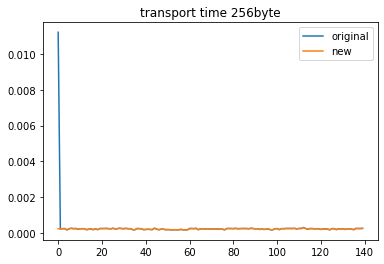

In [13]:
plt.plot(rawdata_non_without[0])
plt.plot(newdata_non_without[0])
plt.legend(('original', 'new'), loc='upper right')  
plt.title('transport time 256byte')  
# plt.savefig('test data fixed and raw compared 256'+ num + '.jpg')
plt.show()

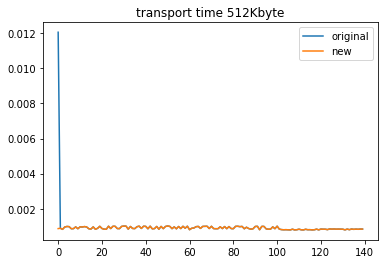

In [14]:
plt.plot(rawdata_non_without[11])
plt.plot(newdata_non_without[11])
plt.legend(('original', 'new'), loc='upper right')  
plt.title('transport time 512Kbyte')  
plt.savefig('test data fixed and raw compared 512K'+ num + '.jpg')
plt.show()

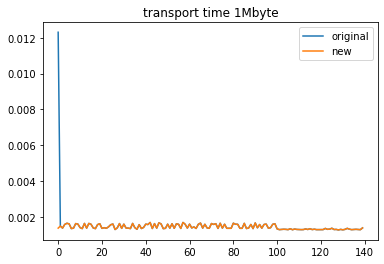

In [15]:
plt.plot(rawdata_non_without[12])
plt.plot(newdata_non_without[12])
plt.legend(('original', 'new'), loc='upper right')  
plt.title('transport time 1Mbyte')  
plt.savefig('test data fixed and raw compared 1M'+ num + '.jpg')
plt.show()

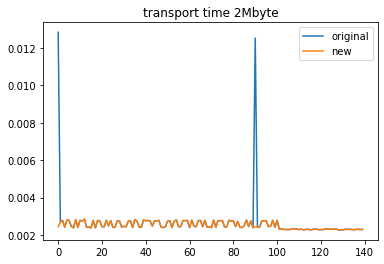

In [16]:
plt.plot(rawdata_non_without[13])
plt.plot(newdata_non_without[13])
plt.legend(('original', 'new'), loc='upper right')  
plt.title('transport time 2Mbyte')  
plt.savefig('test data fixed and raw compared 2M'+ num + '.jpg')
plt.show()

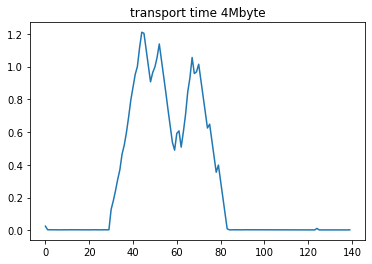

In [48]:
plt.plot(rawdata_non_with[13])
#plt.plot(newdata_non_with[13])
#plt.legend(('original', 'new'), loc='upper right')  
plt.title('transport time 4Mbyte')  
#plt.savefig('test data fixed and raw compared 4M'+ num + '.jpg')
plt.show()

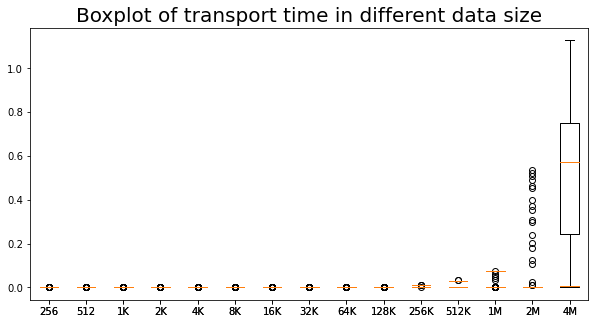

In [18]:
plt.figure(figsize=(10,5))#设置画布的尺寸
plt.title('Boxplot of transport time in different data size',fontsize=20)#标题，并设定字号大小
labels = ['x1','x2']#图例
plt.boxplot(newdata_non_with, labels = ['256', '512', '1K', '2K', '4K', '8K', '16K', '32K', '64K', '128K', '256K', '512K', '1M', '2M', '4M'])#grid=False：代表不显示背景中的网格线
plt.boxplot(newdata_non_without, labels = ['256', '512', '1K', '2K', '4K', '8K', '16K', '32K', '64K', '128K', '256K', '512K', '1M', '2M', '4M'])#grid=False：代表不显示背景中的网格线
# data.boxplot()#画箱型图的另一种方法，参数较少，而且只接受dataframe，不常用
plt.savefig('test data fixed'+ num + '.jpg')
plt.show()#显示图像


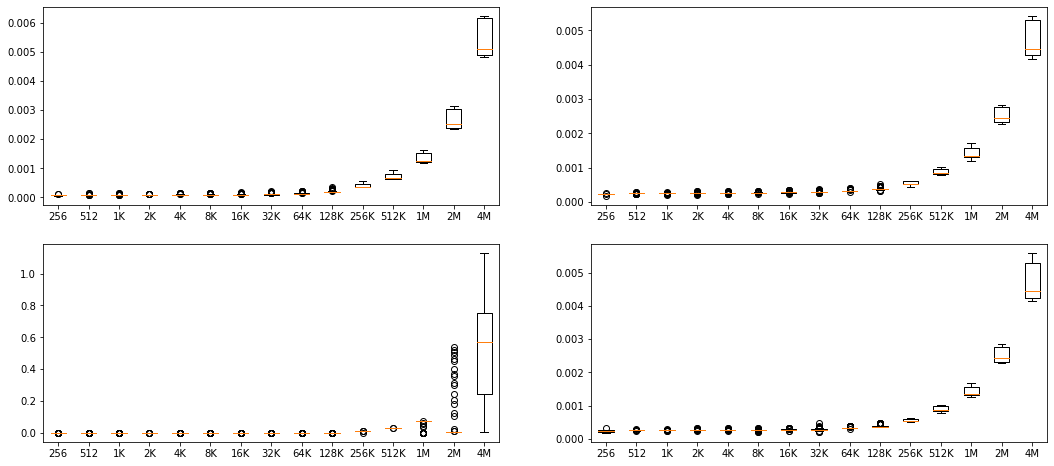

In [19]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(18,8))


bplot1=axes[0][0].boxplot(newdata_with, labels = ['256', '512', '1K', '2K', '4K', '8K', '16K', '32K', '64K', '128K', '256K', '512K', '1M', '2M', '4M'],
                       vert=True)

#axes[0]表示在第一张图的轴上描点画图
#vert=True表示boxplot图是竖着放的

bplot2 = axes[0][1].boxplot(newdata_without, labels = ['256', '512', '1K', '2K', '4K', '8K', '16K', '32K', '64K', '128K', '256K', '512K', '1M', '2M', '4M'],
                         vert=True)
bplot3 = axes[1][0].boxplot(newdata_non_with, labels = ['256', '512', '1K', '2K', '4K', '8K', '16K', '32K', '64K', '128K', '256K', '512K', '1M', '2M', '4M'],
                       vert=True)
bplot4 = axes[1][1].boxplot(newdata_non_without, labels = ['256', '512', '1K', '2K', '4K', '8K', '16K', '32K', '64K', '128K', '256K', '512K', '1M', '2M', '4M'],
                         vert=True)
plt.show()

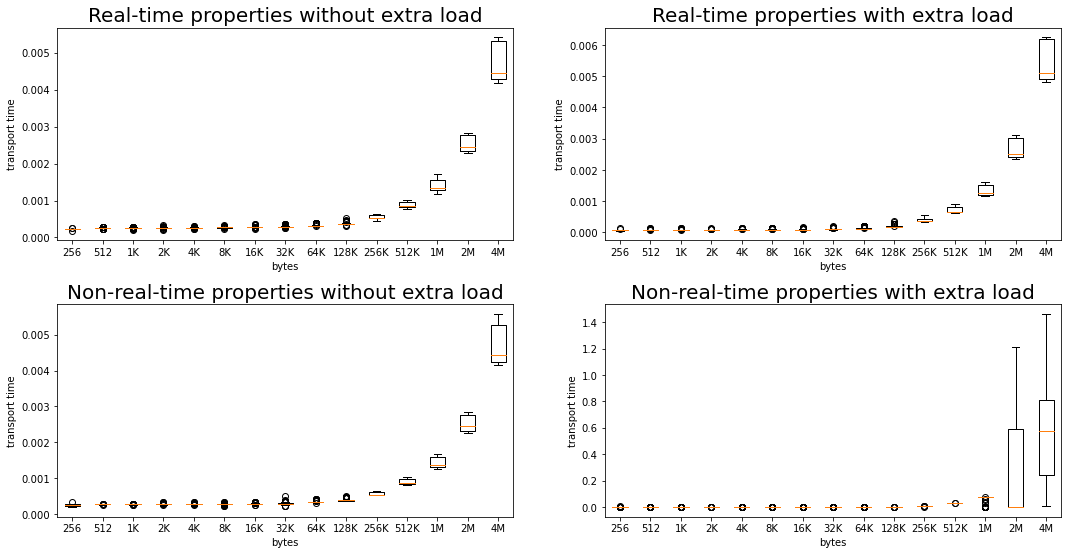

In [46]:
plt.figure(figsize=(18,9))
plt.subplots_adjust(wspace =0.2, hspace =0.3)#调整子图间距
plt.subplot(221)
plt.title('Real-time properties without extra load',fontsize=20)
plt.boxplot(newdata_without, labels = ['256', '512', '1K', '2K', '4K', '8K', '16K', '32K', '64K', '128K', '256K', '512K', '1M', '2M', '4M'])
plt.xlabel("bytes")
plt.ylabel('transport time')
plt.subplot(222)
plt.title('Real-time properties with extra load',fontsize=20)
plt.boxplot(newdata_with, labels = ['256', '512', '1K', '2K', '4K', '8K', '16K', '32K', '64K', '128K', '256K', '512K', '1M', '2M', '4M'])
plt.xlabel("bytes")
plt.ylabel('transport time')
plt.subplot(223)
plt.title('Non-real-time properties without extra load',fontsize=20)
plt.boxplot(newdata_non_without, labels = ['256', '512', '1K', '2K', '4K', '8K', '16K', '32K', '64K', '128K', '256K', '512K', '1M', '2M', '4M'])
plt.xlabel("bytes")
plt.ylabel('transport time')
plt.subplot(224)
plt.title('Non-real-time properties with extra load',fontsize=20)
plt.boxplot(rawdata_non_with, labels = ['256', '512', '1K', '2K', '4K', '8K', '16K', '32K', '64K', '128K', '256K', '512K', '1M', '2M', '4M'])
plt.xlabel("bytes")
plt.ylabel('transport time')
plt.savefig('new test data'+ num + '.png')
plt.show()


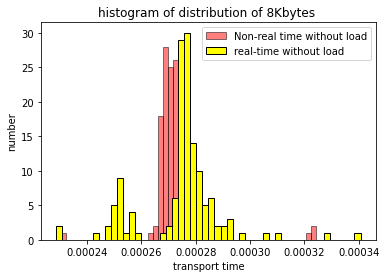

In [49]:
bins = 50
#plt.hist(newdata_with[14], bins=40, facecolor="blue", edgecolor="black", alpha=0.7)
plt.hist(newdata_without[5], bins, facecolor="red", edgecolor="black", alpha=0.5, label='x')
plt.hist(newdata_non_without[5], bins, facecolor="yellow", edgecolor="black", alpha=1, label='y')
plt.legend(('Non-real time without load', 'real-time without load'), loc='upper right') 
# 显示横轴标签
plt.xlabel("transport time")
# 显示纵轴标签
plt.ylabel("number")
# 显示图标题
plt.title("histogram of distribution of 8Kbytes ")
plt.savefig('Q3histo_conclusion1.png')
plt.show()

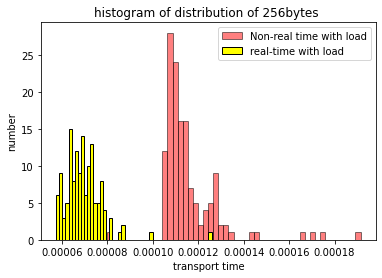

In [50]:
bins = 50
#plt.hist(newdata_with[14], bins=40, facecolor="blue", edgecolor="black", alpha=0.7)
plt.hist(newdata_non_with[0], bins, facecolor="red", edgecolor="black", alpha=0.5, label='x')
plt.hist(newdata_with[0], bins, facecolor="yellow", edgecolor="black", alpha=1, label='y')
plt.legend(('Non-real time with load', 'real-time with load'), loc='upper right') 
# 显示横轴标签
plt.xlabel("transport time")
# 显示纵轴标签
plt.ylabel("number")
# 显示图标题
plt.title("histogram of distribution of 256bytes ")
plt.savefig('Q3histo_conclusion2.png')
plt.show()

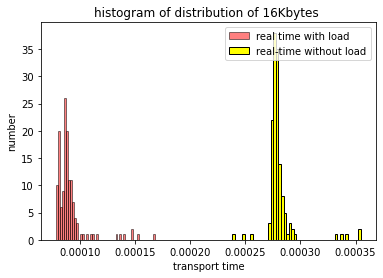

In [51]:
bins = 50
#plt.hist(newdata_with[14], bins=40, facecolor="blue", edgecolor="black", alpha=0.7)
plt.hist(newdata_with[6], bins, facecolor="red", edgecolor="black", alpha=0.5, label='x')
plt.hist(newdata_without[6], bins, facecolor="yellow", edgecolor="black", alpha=1, label='y')
plt.legend(('real time with load', 'real-time without load'), loc='upper right') 
# 显示横轴标签
plt.xlabel("transport time")
# 显示纵轴标签
plt.ylabel("number")
# 显示图标题
plt.title("histogram of distribution of 16Kbytes ")
plt.savefig('Q3histo_conclusion3.png')
plt.show()